# logistic Regression on Campaign responses

<b> Load Dataset

In [10]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [11]:
#load the dataset
data = pd.read_csv(r'C:\Users\santhosh\Downloads\archive (5)\campaign_responses.csv')
data

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes
5,6,25,Female,38000,630,No,Single,0,No
6,7,39,Male,72000,740,Yes,Married,2,Yes
7,8,33,Female,48000,670,Yes,Single,0,No
8,9,51,Male,110000,820,Yes,Married,3,Yes
9,10,27,Female,40000,620,No,Single,0,No


In [12]:
data.head()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes


In [13]:
data.tail()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
51,52,31,Female,50000,680,Yes,Single,0,No
52,53,46,Male,98000,800,Yes,Married,3,Yes
53,54,28,Female,42000,630,No,Single,0,No
54,55,41,Male,90000,770,Yes,Married,2,Yes
55,56,34,Female,60000,710,Yes,Single,1,No


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     56 non-null     int64 
 1   age             56 non-null     int64 
 2   gender          56 non-null     object
 3   annual_income   56 non-null     int64 
 4   credit_score    56 non-null     int64 
 5   employed        56 non-null     object
 6   marital_status  56 non-null     object
 7   no_of_children  56 non-null     int64 
 8   responded       56 non-null     object
dtypes: int64(5), object(4)
memory usage: 4.1+ KB


In [15]:
data.describe(include='all')

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
count,56.000000,56.000000,56,56.000000,56.000000,56,56,56.000000,56
unique,NaN,NaN,2,NaN,NaN,2,2,NaN,2
top,NaN,NaN,Male,NaN,NaN,Yes,Married,NaN,Yes
freq,NaN,NaN,28,NaN,NaN,43,28,NaN,28
mean,28.500000,36.214286,NaN,69017.857143,719.107143,NaN,NaN,1.285714,NaN
std,16.309506,7.088311,NaN,22784.756524,60.340753,NaN,NaN,1.186504,NaN
min,1.000000,25.000000,NaN,35000.000000,600.000000,NaN,NaN,0.000000,NaN
25%,14.750000,30.000000,NaN,48000.000000,677.500000,NaN,NaN,0.000000,NaN
50%,28.500000,35.500000,NaN,64500.000000,720.000000,NaN,NaN,1.000000,NaN
75%,42.250000,42.000000,NaN,90000.000000,770.000000,NaN,NaN,2.000000,NaN


<b> Data Cleaning

In [23]:
data.isna().sum()

customer_id       0
age               0
gender            0
annual_income     0
credit_score      0
employed          0
marital_status    0
no_of_children    0
responded         0
dtype: int64

In [25]:
data.duplicated().sum()

0

<b>Exploratory Data Analysis

Text(0.5, 0, 'age')

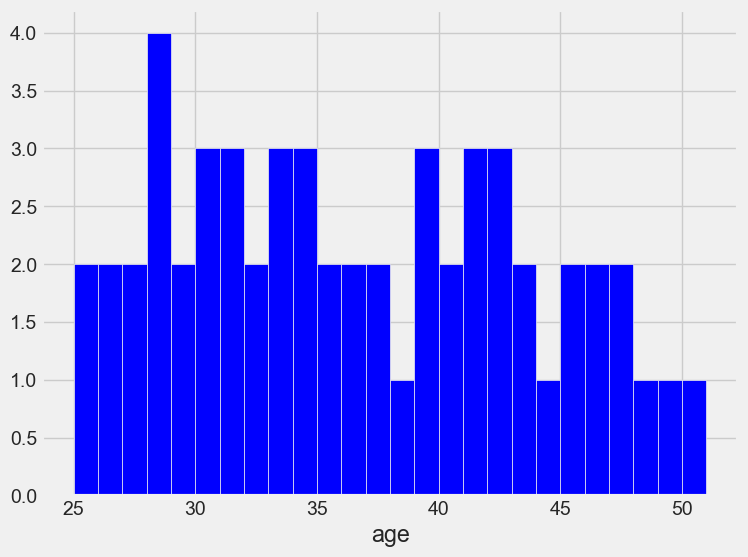

In [9]:
plt.figure(figsize=(8, 6))
data.age.hist(bins=data.age.nunique(), color='blue')
plt.xlabel('age')

<Figure size 800x600 with 0 Axes>

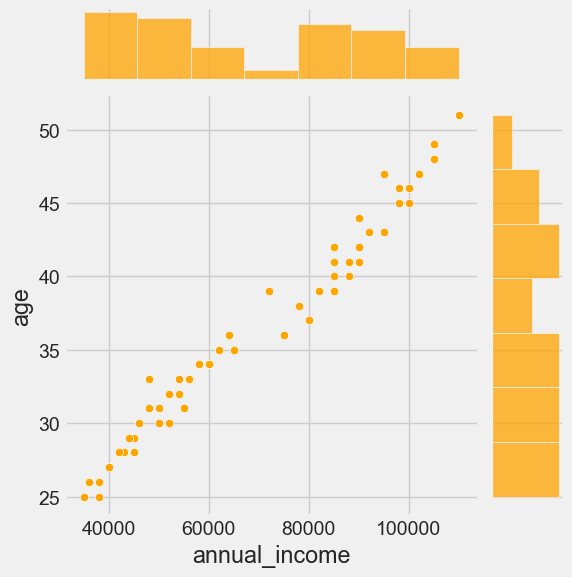

In [10]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["annual_income"], y=data.age, color='orange')

<Figure size 800x600 with 0 Axes>

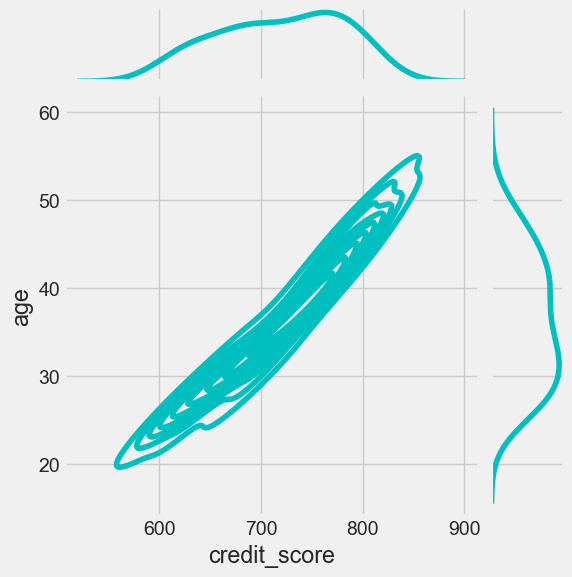

In [11]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["credit_score"], y=data.age, kind='kde', color='c')

<Figure size 800x600 with 0 Axes>

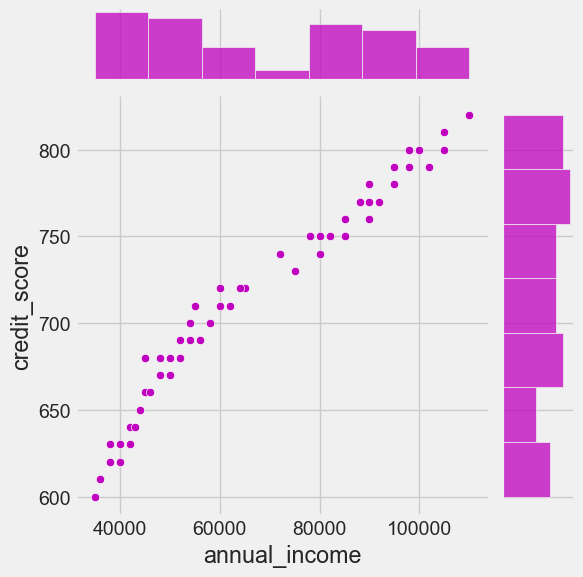

In [12]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["annual_income"], y=data["credit_score"], color='m')

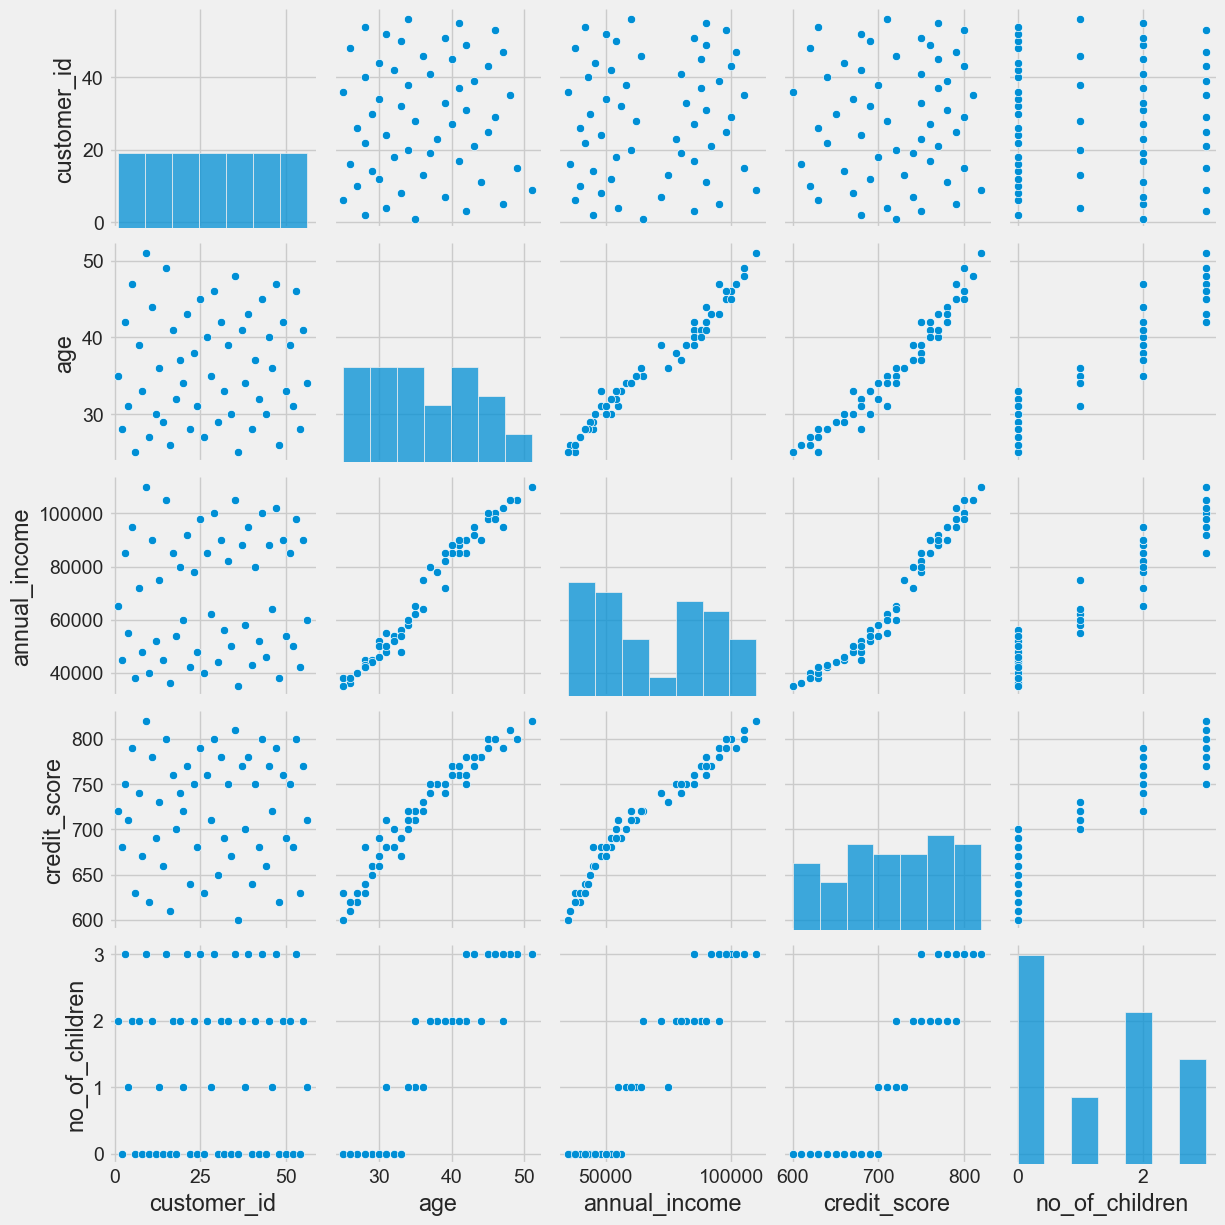

In [13]:
sns.pairplot(data)

In [14]:
data['responded'].value_counts()

responded
Yes    28
No     28
Name: count, dtype: int64

<b> Future Engineering

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n= ")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n=")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

<b> Train-Test Split

In [31]:
#model evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split


X = data.drop(['gender', 'employed', 'marital_status'], axis=1)
y = data['responded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# cat_columns = []
num_columns = ['customer_id', 'age', 'annual_income','credit_score','no_of_children']


ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder = 'passthrough'
)

X_train_encoded = pd.get_dummies(X_train) # changing the categorical vales to numeral values
X_test_encoded = pd.get_dummies(X_test)

X_train = ct.fit_transform(X_train_encoded)
X_test = ct.transform(X_test_encoded)

<b> Applying Algorithm

In [34]:
#test results
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

<b> Predicted Values

In [37]:
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
= 
Accuracy Score: 100.00%
CLASSIFICATION REPORT:
             No   Yes  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    22.0  17.0       1.0       39.0          39.0
Confusion Matrix: 
 [[22  0]
 [ 0 17]]

Test Result:
=
Accuracy Score: 100.00%
CLASSIFICATION REPORT:
            No   Yes  accuracy  macro avg  weighted avg
precision  1.0   1.0       1.0        1.0           1.0
recall     1.0   1.0       1.0        1.0           1.0
f1-score   1.0   1.0       1.0        1.0           1.0
support    6.0  11.0       1.0       17.0          17.0
Confusion Matrix: 
 [[ 6  0]
 [ 0 11]]



The logistic regression model demonstrates exceptional performance with 100% accuracy, precision, recall, and F1-score for both the training and testing datasets. The model effectively classifies instances into the 'No' and 'Yes' classes with no misclassifications observed. This indicates that the model is highly accurate and reliable for predicting whether an instance belongs to either class.